In [47]:
#################################
#                               #
#         Data Science          #
#    Apprentissage supervise    #
#                               #
#################################

Code Python inspiré en partie (visualisation) du cours "Apprentissage statistique : modélisation décisionnelle et apprentissage profond (RCP209)"

In [7]:
# Librairies à importer

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import graphviz
plt.ion()

# https://scikit-learn.org/
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import linear_model
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score

# APPRENTISSAGE SUPERVISE - CLASSEMENT

### Données

In [8]:
# Importation des données

df_dataC = pd.read_csv('../data/df_dataC.csv', delimiter = ';')
df_dataC

,var1,var2,Class
0,-0.237873,1.001832,1
1,1.164702,0.650348,1
2,1.662845,3.405048,1
3,0.094154,-1.912109,1
4,-0.194990,-0.107748,1
...,...,...,...
275,5.098798,-7.527839,0
276,3.751656,-6.801651,0
277,4.058845,-8.814860,0
278,6.327635,-6.168016,0


In [9]:
# Variables explicatives
data = df_dataC[['var1','var2']].to_numpy()

# Etiquettes de classe
labels = df_dataC['Class'].to_numpy()

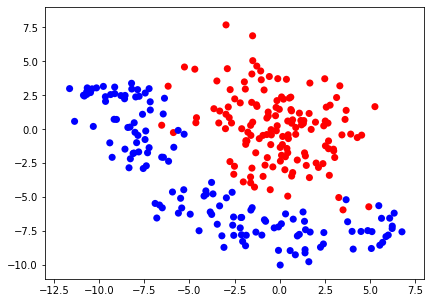

In [10]:
# Visualisation des données

# Couleur des classes
cmp = np.array(['b','r'])

# Affichage
plt.figure(figsize=(6.8,5))
plt.xlim((-13, 8))
plt.ylim((-11, 9))
plt.scatter(data[:,0],data[:,1],c=cmp[labels],s=50,edgecolors='none')

In [12]:
# Découpage entre données d’apprentissage (2/3) et données de test (1/3)

X_train1, X_test1, y_train1, y_test1 = train_test_split(data, labels, test_size=0.33)

In [13]:
print(len(X_train1),'données d\'apprentissage')
print(len(X_test1),'données de test')

187 données d'apprentissage
93 données de test


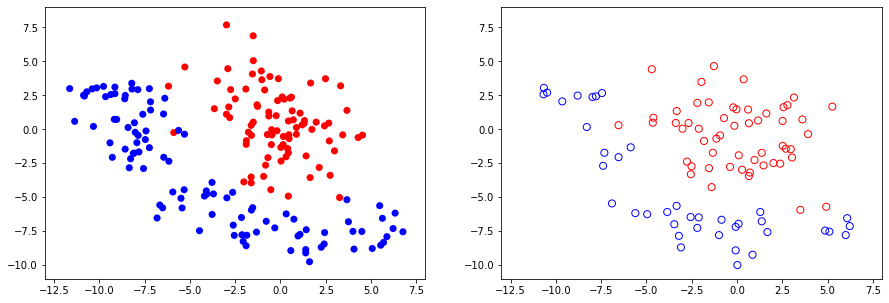

In [14]:
# Visualisation des données

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.xlim((-13, 8))
plt.ylim((-11, 9))
plt.scatter(X_train1[:,0], X_train1[:,1], c=cmp[y_train1], s=50, edgecolors='none')

plt.subplot(1, 2, 2)
plt.xlim((-13, 8))
plt.ylim((-11, 9))
plt.scatter(X_test1[:,0], X_test1[:,1], c='none', s=50,edgecolors=cmp[y_test1])

### Modèle linéaire

In [15]:
lda = LinearDiscriminantAnalysis()

In [16]:
### Evaluation

lda.fit(X_train1, y_train1)

ldaScore_train = "%.3f" % lda.score(X_train1, y_train1)
ldaScore_test = "%.3f" % lda.score(X_test1, y_test1)

print("Train:",ldaScore_train)
print("Test:",ldaScore_test)

Train: 0.920
Test: 0.882


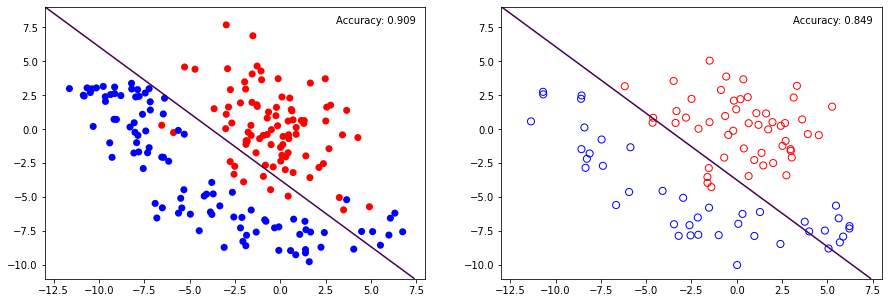

In [57]:
### Visualisation du modèle linéaire

plt.figure(figsize=(15,5))

# Train
plt.subplot(1, 2, 1)
plt.xlim((-13, 8))
plt.ylim((-11, 9))
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.plot([], [], ' ', label = 'Accuracy: ' + ldaScore_train)

# Création de la frontière de discrimination avec un seuil de sortie 'seuil'
seuil = 0.5
nx, ny = 300, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [seuil])
plt.legend(frameon=False)

# Test
plt.subplot(1, 2, 2)
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])
plt.xlim((-13, 8))
plt.ylim((-11, 9))
plt.plot([], [], ' ', label = 'Accuracy: ' + ldaScore_test)

# Création de la frontière de discrimination avec un seuil de sortie 'seuil'
seuil = 0.5
nx, ny = 300, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [seuil])
plt.legend(frameon=False)

In [58]:
### Mesure d'évaluation

lda_eval = precision_recall_fscore_support(y_train1, lda.predict(X_train1), average=None)
print("Train")
print("  - Precision 0", lda_eval[0][0].round(3))
print("  - Precision 1", lda_eval[0][1].round(3))
print("  - Recall 0", lda_eval[1][0].round(3))
print("  - Recall 1", lda_eval[1][1].round(3))
print("  - F-mesure 0", lda_eval[2][0].round(3))
print("  - F-mesure 1", lda_eval[2][1].round(3))
lda_eval = precision_recall_fscore_support(y_test1, lda.predict(X_test1), average=None)
print("Test")
print("  - Precision 0", lda_eval[0][0].round(3))
print("  - Precision 1", lda_eval[0][1].round(3))
print("  - Recall 0", lda_eval[1][0].round(3))
print("  - Recall 1", lda_eval[1][1].round(3))
print("  - F-mesure 0", lda_eval[2][0].round(3))
print("  - F-mesure 1", lda_eval[2][1].round(3))

Train
  - Precision 0 0.91
  - Precision 1 0.908
  - Recall 0 0.919
  - Recall 1 0.898
  - F-mesure 0 0.915
  - F-mesure 1 0.903
Test
  - Precision 0 0.865
  - Precision 1 0.839
  - Recall 0 0.78
  - Recall 1 0.904
  - F-mesure 0 0.821
  - F-mesure 1 0.87


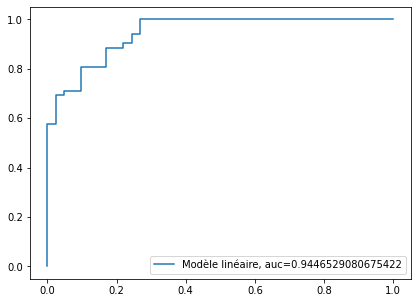

In [59]:
# Courbe ROC

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
y_pred_proba = lda.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1, y_pred_proba)
auc = roc_auc_score(y_test1, y_pred_proba)
plt.plot(fpr,tpr,label="Modèle linéaire, auc="+str(auc))
plt.legend(loc=4)

### Modèle PMC avec alpha = 1e-05

In [60]:
clf_00001 = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
                          beta_2=0.999, early_stopping=False, epsilon=1e-08,
                          hidden_layer_sizes=(100,), learning_rate='constant',
                          learning_rate_init=0.001, max_iter=200, momentum=0.9,
                          n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                          random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
                          validation_fraction=0.1, verbose=False, warm_start=False)

In [61]:
# Evaluation et affichage sur split1

clf_00001.fit(X_train1, y_train1)

clf_00001Score_train = "%.3f" % clf_00001.score(X_train1, y_train1)
clf_00001Score_test = "%.3f" % clf_00001.score(X_test1, y_test1)

print("Train:",clf_00001Score_train)
print("Test:",clf_00001Score_test)

Train: 0.979
Test: 0.978


C:\Users\erebz\anaconda3\envs\data-science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


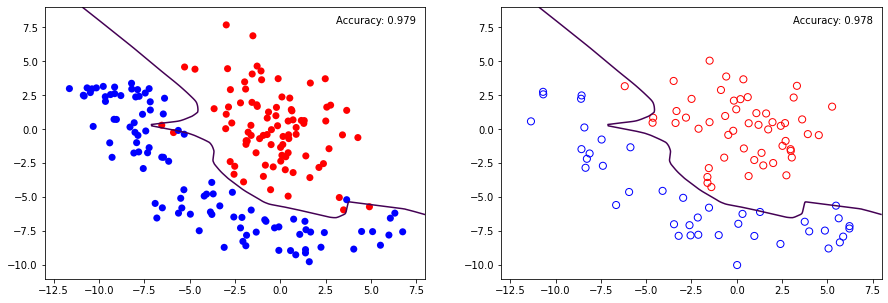

In [62]:
### Visualisation

plt.figure(figsize=(15,5))

# Train
plt.subplot(1, 2, 1)
plt.xlim((-13, 8))
plt.ylim((-11, 9))
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.plot([], [], ' ', label = 'Accuracy: ' + clf_00001Score_train)

# Création de la frontière de discrimination avec un seuil de sortie 'seuil'
seuil = 0.5
nx, ny = 300, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf_00001.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [seuil])
plt.legend(frameon=False)

# Test
plt.subplot(1, 2, 2)
plt.xlim((-13, 8))
plt.ylim((-11, 9))
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])
plt.plot([], [], ' ', label = 'Accuracy: ' + clf_00001Score_test)

# Création de la frontière de discrimination avec un seuil de sortie 'seuil'
seuil = 0.5
nx, ny = 300, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf_00001.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [seuil])
plt.legend(frameon=False)

In [63]:
### Mesure d'évaluation

clf_00001_eval = precision_recall_fscore_support(y_train1,clf_00001.predict(X_train1),average=None)
print("Train")
print("  - Precision 0", clf_00001_eval[0][0].round(3))
print("  - Precision 1", clf_00001_eval[0][1].round(3))
print("  - Recall 0", clf_00001_eval[1][0].round(3))
print("  - Recall 1", clf_00001_eval[1][1].round(3))
print("  - F-mesure 0", clf_00001_eval[2][0].round(3))
print("  - F-mesure 1", clf_00001_eval[2][1].round(3))
clf_00001_eval = precision_recall_fscore_support(y_test1,clf_00001.predict(X_test1),average=None)
print("Test")
print("  - Precision 0", clf_00001_eval[0][0].round(3))
print("  - Precision 1", clf_00001_eval[0][1].round(3))
print("  - Recall 0", clf_00001_eval[1][0].round(3))
print("  - Recall 1", clf_00001_eval[1][1].round(3))
print("  - F-mesure 0", clf_00001_eval[2][0].round(3))
print("  - F-mesure 1", clf_00001_eval[2][1].round(3))

Train
  - Precision 0 0.98
  - Precision 1 0.977
  - Recall 0 0.98
  - Recall 1 0.977
  - F-mesure 0 0.98
  - F-mesure 1 0.977
Test
  - Precision 0 0.976
  - Precision 1 0.981
  - Recall 0 0.976
  - Recall 1 0.981
  - F-mesure 0 0.976
  - F-mesure 1 0.981


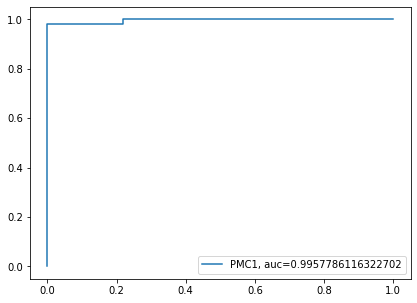

In [64]:
# Courbe ROC

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
y_pred_proba = clf_00001.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1,  y_pred_proba)
auc = roc_auc_score(y_test1, y_pred_proba)
plt.plot(fpr,tpr,label="PMC1, auc="+str(auc))
plt.legend(loc=4)

### Modèle PMC avec alpha = 1

In [65]:
clf_1 = MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [66]:
# Evaluation

clf_1.fit(X_train1, y_train1)

clf_1Score_train = "%.3f" % clf_1.score(X_train1, y_train1)
clf_1Score_test = "%.3f" % clf_1.score(X_test1, y_test1)

print("Train:",clf_1Score_train)
print("Test:",clf_1Score_test)

Train: 0.973
Test: 0.978


C:\Users\erebz\anaconda3\envs\data-science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


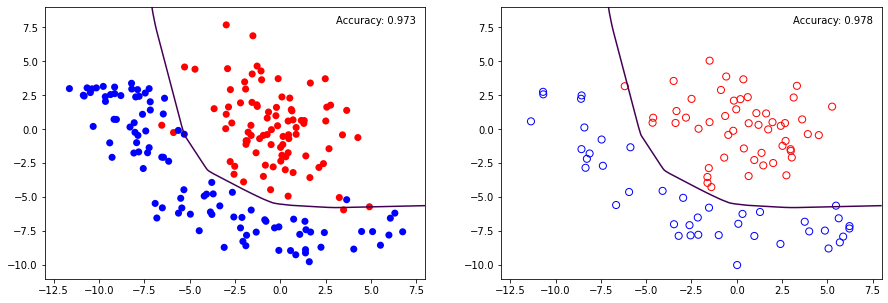

In [67]:
### Visualisation

plt.figure(figsize=(15,5))

# Train
plt.subplot(1, 2, 1)
plt.xlim((-13, 8))
plt.ylim((-11, 9))
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.plot([], [], ' ', label = 'Accuracy: ' + clf_1Score_train)

# Création de la frontière de discrimination avec un seuil de sortie 'seuil'
seuil = 0.5
nx, ny = 300, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf_1.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [seuil])
plt.legend(frameon=False)

# Test
plt.subplot(1, 2, 2)
plt.xlim((-13, 8))
plt.ylim((-11, 9))
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])
plt.plot([], [], ' ', label = 'Accuracy: ' + clf_1Score_test)

# Création de la frontière de discrimination avec un seuil de sortie 'seuil'
seuil = 0.5
nx, ny = 300, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf_1.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [seuil])
plt.legend(frameon=False)

In [68]:
### Mesure d'évaluation

clf_1_eval = precision_recall_fscore_support(y_train1,clf_1.predict(X_train1),average=None)
print("Train")
print("  - Precision 0", clf_1_eval[0][0].round(3))
print("  - Precision 1", clf_1_eval[0][1].round(3))
print("  - Recall 0", clf_1_eval[1][0].round(3))
print("  - Recall 1", clf_1_eval[1][1].round(3))
print("  - F-mesure 0", clf_1_eval[2][0].round(3))
print("  - F-mesure 1", clf_1_eval[2][1].round(3))
clf_1_eval = precision_recall_fscore_support(y_test1,clf_1.predict(X_test1),average=None)
print("Test")
print("  - Precision 0", clf_1_eval[0][0].round(3))
print("  - Precision 1", clf_1_eval[0][1].round(3))
print("  - Recall 0", clf_1_eval[1][0].round(3))
print("  - Recall 1", clf_1_eval[1][1].round(3))
print("  - F-mesure 0", clf_1_eval[2][0].round(3))
print("  - F-mesure 1", clf_1_eval[2][1].round(3))

Train
  - Precision 0 0.97
  - Precision 1 0.977
  - Recall 0 0.98
  - Recall 1 0.966
  - F-mesure 0 0.975
  - F-mesure 1 0.971
Test
  - Precision 0 0.976
  - Precision 1 0.981
  - Recall 0 0.976
  - Recall 1 0.981
  - F-mesure 0 0.976
  - F-mesure 1 0.981


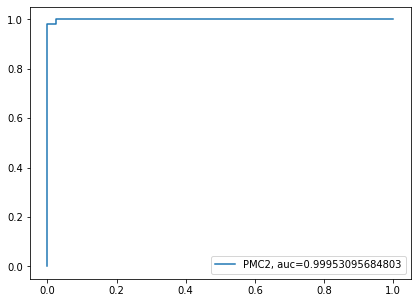

In [69]:
# Courbe ROC

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
y_pred_proba = clf_1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1,  y_pred_proba)
auc = roc_auc_score(y_test1, y_pred_proba)
plt.plot(fpr,tpr,label="PMC2, auc="+str(auc))
plt.legend(loc=4)

### Modèle Décision Tree

In [70]:
dt = tree.DecisionTreeClassifier()

In [71]:
# Evaluation et affichage sur split1

dt = dt.fit(X_train1, y_train1)

dtScore_train = "%.3f" % dt.score(X_train1, y_train1)
dtScore_test = "%.3f" % dt.score(X_test1, y_test1)

print("Train:",dtScore_train)
print("Test:",dtScore_test)

Train: 1.000
Test: 0.914


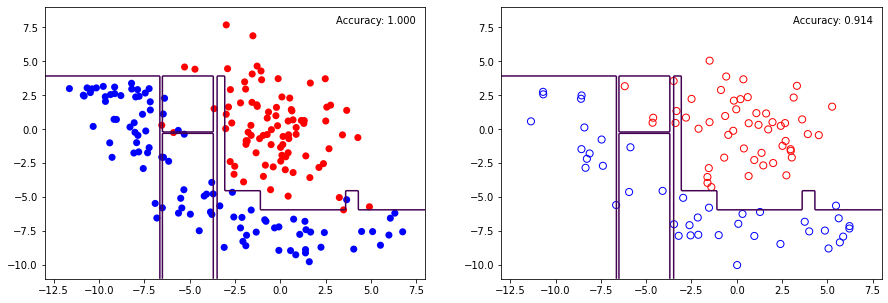

In [72]:
# Visualisation

plt.figure(figsize=(15,5))
plot_step = 0.02

plt.subplot(1, 2, 1)
plt.xlim((-13, 8))
plt.ylim((-11, 9))
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.plot([], [], ' ', label = 'Accuracy: ' + dtScore_train)
nx, ny = 300, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = dt.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [0.5])
plt.legend(frameon=False)

plt.subplot(1, 2, 2)
plt.xlim((-13, 8))
plt.ylim((-11, 9))
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])
plt.plot([], [], ' ', label = 'Accuracy: ' + dtScore_test)
nx, ny = 300, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = dt.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [0.5])
plt.legend(frameon=False)

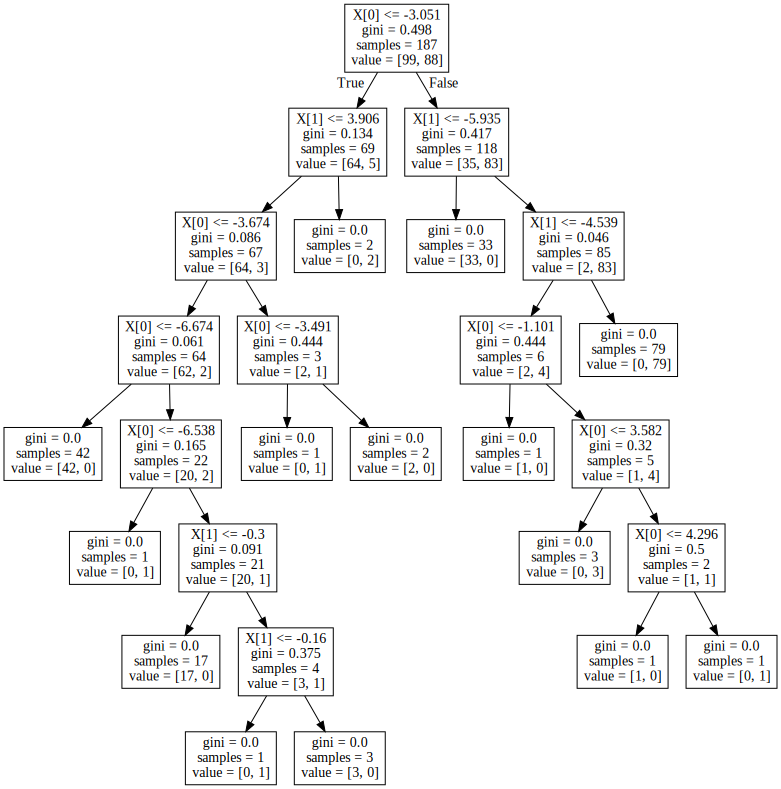

In [73]:
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data)
graph 

In [74]:
# Mesure d'évaluation

dt_eval = precision_recall_fscore_support(y_train1,dt.predict(X_train1),average=None)
print("Train")
print("  - Precision 0", dt_eval[0][0].round(3))
print("  - Precision 1", dt_eval[0][1].round(3))
print("  - Recall 0", dt_eval[1][0].round(3))
print("  - Recall 1", dt_eval[1][1].round(3))
print("  - F-mesure 0", dt_eval[2][0].round(3))
print("  - F-mesure 1", dt_eval[2][1].round(3))
dt_eval = precision_recall_fscore_support(y_test1,dt.predict(X_test1),average=None)
print("Test")
print("  - Precision 0", dt_eval[0][0].round(3))
print("  - Precision 1", dt_eval[0][1].round(3))
print("  - Recall 0", dt_eval[1][0].round(3))
print("  - Recall 1", dt_eval[1][1].round(3))
print("  - F-mesure 0", dt_eval[2][0].round(3))
print("  - F-mesure 1", dt_eval[2][1].round(3))

Train
  - Precision 0 1.0
  - Precision 1 1.0
  - Recall 0 1.0
  - Recall 1 1.0
  - F-mesure 0 1.0
  - F-mesure 1 1.0
Test
  - Precision 0 0.867
  - Precision 1 0.958
  - Recall 0 0.951
  - Recall 1 0.885
  - F-mesure 0 0.907
  - F-mesure 1 0.92


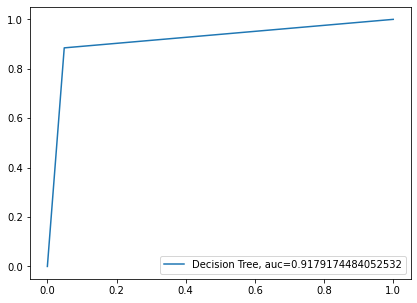

In [75]:
# Courbe ROC

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
y_pred_proba = dt.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1,  y_pred_proba)
auc = roc_auc_score(y_test1, y_pred_proba)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))
plt.legend(loc=4)

# APPRENTISSAGE SUPERVISE - REGRESSION

In [76]:
# Importation des données

df_dataR = pd.read_csv('data/df_dataR.csv', delimiter = ';')
df_dataR

,x,y
0,-19.115434,8.764010
1,-21.199503,6.615206
2,-21.415447,7.346637
3,-21.135714,8.547653
4,-19.793121,6.789333
...,...,...
105,18.959209,-6.775263
106,21.309190,-5.775077
107,21.725770,-7.503897
108,17.062046,-6.928545


In [77]:
# Variables explicatives
data = df_dataR[['x']].to_numpy()

# Variable à prévoir
y = df_dataR[['y']].to_numpy()
y = y.flatten()

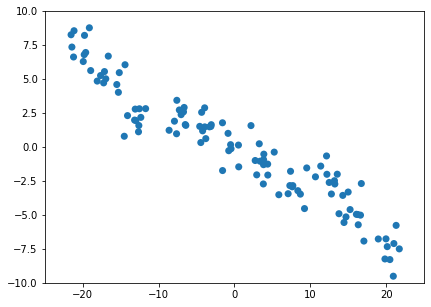

In [78]:
# Visualisation des données

plt.figure(figsize=(6.8,5))
plt.xlim((-25, 25))
plt.ylim((-10, 10))
plt.scatter(data[:,0],y,s=50,edgecolors='none')

In [79]:
# Découpage entre données d’apprentissage et données de test

X_train2, X_test2, y_train2, y_test2 = train_test_split(data, y, test_size=0.33)

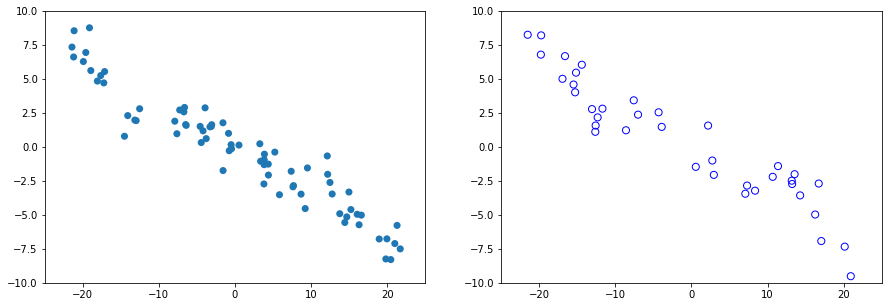

In [80]:
# Visualisation des données

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.xlim((-25, 25))
plt.ylim((-10, 10))
plt.scatter(X_train2,y_train2,s=50,edgecolors='none')

plt.subplot(1, 2, 2)
plt.xlim((-25, 25))
plt.ylim((-10, 10))
plt.scatter(X_test2,y_test2,c='none',s=50,edgecolors='blue')

### Modèle linéaire

In [81]:
reg = linear_model.LinearRegression()

In [82]:
# Evaluation

reg.fit(X_train2, y_train2)

# Erreur quadratique
reg_MSE_Train = "%.3f" % mean_squared_error(reg.predict(X_train2),y_train2)
reg_MSE_Test = "%.3f" % mean_squared_error(reg.predict(X_test2),y_test2)

print("MSE Train:",reg_MSE_Train)
print("MSE Test:",reg_MSE_Test)

MSE Train: 1.412
MSE Test: 2.240


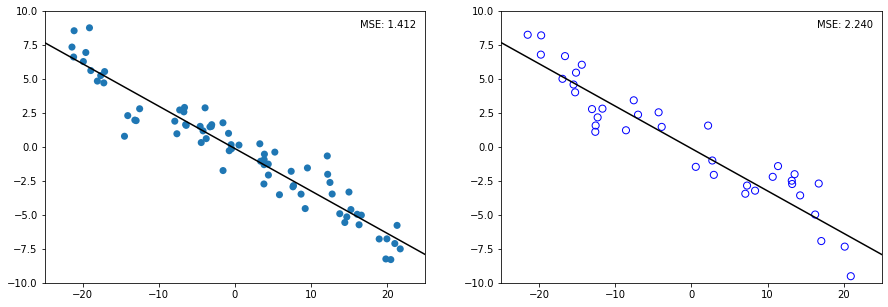

In [83]:
# Visualisation du modèle linéaire

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.xlim((-25, 25))
plt.ylim((-10, 10))
plt.scatter(X_train2,y_train2,s=50,edgecolors='none')
plt.plot([], [], ' ', label = 'MSE: ' + reg_MSE_Train)
nx = 100
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,reg.predict(xx.reshape(-1,1)),color='black')
plt.legend(frameon=False)

plt.subplot(1, 2, 2)
plt.xlim((-25, 25))
plt.ylim((-10, 10))
plt.scatter(X_test2,y_test2,c='none',s=50,edgecolors='blue')
plt.plot([], [], ' ', label = 'MSE: ' + reg_MSE_Test)
nx = 100
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,reg.predict(xx.reshape(-1,1)),color='black')
plt.legend(frameon=False)

### Modèle PMC avec alpha = 1e-05

In [84]:
reg_00001 = MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [85]:
# Evaluation

reg_00001.fit(X_train2, y_train2)

reg_00001_MSE_Train = "%.3f" % mean_squared_error(reg_00001.predict(X_train2),y_train2)
reg_00001_MSE_Test = "%.3f" % mean_squared_error(reg_00001.predict(X_test2),y_test2)

print("MSE Train:",reg_00001_MSE_Train)
print("MSE Test:",reg_00001_MSE_Test)

MSE Train: 1.001
MSE Test: 2.262


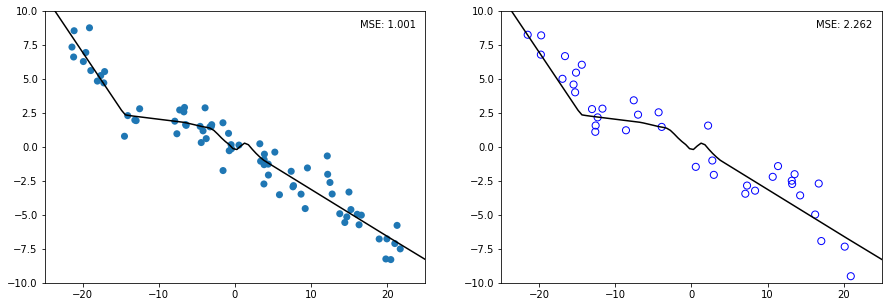

In [86]:
# Visualisation

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.xlim((-25, 25))
plt.ylim((-10, 10))
plt.scatter(X_train2,y_train2,s=50,edgecolors='none')
plt.plot([], [], ' ', label = 'MSE: ' + reg_00001_MSE_Train)
nx = 100
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,reg_00001.predict(xx.reshape(-1,1)),color='black')
plt.legend(frameon=False)

plt.subplot(1, 2, 2)
plt.xlim((-25, 25))
plt.ylim((-10, 10))
plt.scatter(X_test2,y_test2,c='none',s=50,edgecolors='blue')
plt.plot([], [], ' ', label = 'MSE: ' + reg_00001_MSE_Test)
nx = 100
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,reg_00001.predict(xx.reshape(-1,1)),color='black')
plt.legend(frameon=False)

### Modèle PMC avec alpha = 1

In [87]:
reg_1 = MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [88]:
# Evaluation

reg_1.fit(X_train2, y_train2)

reg_1_MSE_Train = "%.3f" % mean_squared_error(reg_1.predict(X_train2),y_train2)
reg_1_MSE_Test = "%.3f" % mean_squared_error(reg_1.predict(X_test2),y_test2)

print("MSE Train:",reg_1_MSE_Train)
print("MSE Test:",reg_1_MSE_Test)

MSE Train: 1.063
MSE Test: 1.822


C:\Users\erebz\anaconda3\envs\data-science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


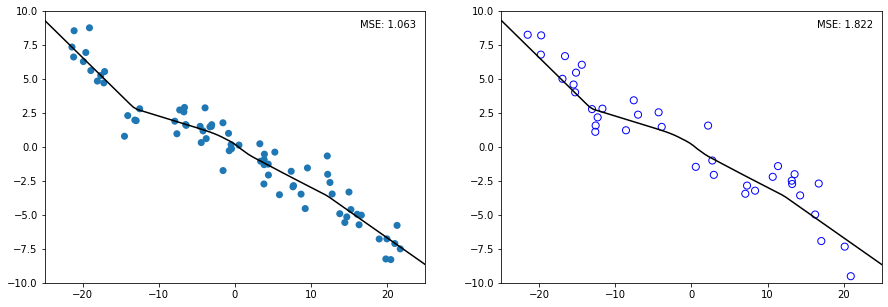

In [89]:
# Visualisation

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.xlim((-25, 25))
plt.ylim((-10, 10))
plt.scatter(X_train2,y_train2,s=50,edgecolors='none')
plt.plot([], [], ' ', label = 'MSE: ' + reg_1_MSE_Train)
nx = 100
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,reg_1.predict(xx.reshape(-1,1)),color='black')
plt.legend(frameon=False)

plt.subplot(1, 2, 2)
plt.xlim((-25, 25))
plt.ylim((-10, 10))
plt.scatter(X_test2,y_test2,c='none',s=50,edgecolors='blue')
plt.plot([], [], ' ', label = 'MSE: ' + reg_1_MSE_Test)
nx = 100
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,reg_1.predict(xx.reshape(-1,1)),color='black')
plt.legend(frameon=False)